# Hugging Face – Mastering AI Bootcamp
Welcome to Hugging Face: the pioneer in Natural Language Processing (NLP). Built on PyTorch, it offers a rich ecosystem that simplifies working with Transformer models. With Hugging Face, leveraging state-of-the-art NLP capabilities becomes an exciting exploration rather than a complex task.

Explore the [**Hugging Face Library**](https://huggingface.co/docs/hub/index) for all your **Natural Language Processing (NLP)** needs:

1.  **Model Setup**: Jump-start your AI journey.
2.  **Management**: Regulate your models efficiently.
3.  **Deployment**: Launch your AI quickly.

Installation and Configuration
------------------------------

Starting your NLP journey with the **Hugging Face Library** is easy! If you use pip or conda, simply open your terminal and type in:


In [3]:
# For pip users:
!pip install transformers

# For conda aficionados:
#conda install -c huggingface transformers

/bin/bash: line 1: conda: command not found


For a more detailed guide, visit the [official documentation](https://huggingface.co/docs/transformers/installation). Welcome aboard the NLP adventure!


In [4]:
%pip install transformers sentencepiece

The code snippet showcases how to use the Hugging Face Library:

It imports `pipeline` from `transformers` and builds a text classification pipeline with a “distilbert-base-uncased-finetuned-sst-2-english” model. It then classifies the phrase “Hello world”. This succinct code conducts sentiment analysis using a pretrained DistilBERT model!

In [5]:
from transformers import pipeline
pipe = pipeline("text-classification", model="distilbert-base-uncased-finetuned-sst-2-english")
pipe("Hello world")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0


[{'label': 'POSITIVE', 'score': 0.9997522234916687}]

Transformers
------------

This model, from a “High-Level Look”, acts as a ‘black box’ in machine **translation applications** with transformer model, converting a sentence from one language into its translation in another.

![](https://storage.googleapis.com/rg-ai-bootcamp/model_usage/transformer-1.png)

Transformer High Level Look


In [7]:
from transformers import pipeline

def translation(input):
    translator = pipeline("translation", model="Helsinki-NLP/opus-mt-en-id")
    output = translator(input, max_length=40)[0]['translation_text']
    return output

In [8]:
input_text = "I am a student"
output = translation(input_text)
print(output)

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/291M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/796k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/801k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")
Device set to use cuda:0


Saya seorang mahasiswa


Let’s see what’s inside transformers?

Popping open that Transformer, we can observe an **encoding component**, a **decoding component**, and the intricate connections between them.

![](https://storage.googleapis.com/rg-ai-bootcamp/model_usage/transformer-2.png)

Transformer components

In the Transformer model, the encoding section is made up of a stack of encoders, while the decoding section has an equal stack of decoders.

![](https://storage.googleapis.com/rg-ai-bootcamp/model_usage/transformer-3.png)

Transformers Encoder Decoder

### Code overview of how the Encoder and Decoder Transformer Model work

First, import the `model` and `tokenizer` from the transformers with pretrained model “Helsinki-NLP/opus-mt-en-id”:

In [9]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model = AutoModelForSeq2SeqLM.from_pretrained("Helsinki-NLP/opus-mt-en-id")
tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-id")

Here, model is a pretrained Seq2Seq Transformer model (Encoder and Decoder) and tokenizer is a way to turn plain text into tokens that the model can understand.

Next, we take the sentence, “I am a student”, and convert it to tokens:

In [11]:
sentence = "I am a student"
inputs = tokenizer.encode(sentence, return_tensors="pt")

print(inputs)

tensor([[   7,  303,   15, 4846,    0]])


`inputs` is now a tokenized representation of the sentence that can be processed by the model.

Following the typical Seq2Seq model workflow, in this step, the encoder of the **Seq2Seq** model processes the input and generates an internal representation:

In [12]:
outputs = model.generate(inputs, max_length=40)
print(outputs)

tensor([[54795,   200,   227,  8912,     0]])


`outputs` is the internal representation created by the encoder part of the model.

Finally, we decode this output back into human-readable text:

In [14]:
decoded = tokenizer.decode(outputs[0])
print(decoded)

<pad> Saya seorang mahasiswa</s>


`decoded` is the translated text output by the model. At this stage, the decoder has taken the internal representation from the encoder and produced the desired text output.

Flow of Information
-------------------

The animation below illustrates how we apply the Transformer to machine translation

![](https://storage.googleapis.com/rg-ai-bootcamp/model_usage/transform20fps.gif)

Transform Gif

[Google’s Visualization describes it all!](https://ai.googleblog.com/2017/08/transformer-novel-neural-network.html)

\## Self-Attention

Transformers are deep learning models that use **self-attention** to process sequential input data, such as natural language or images. Now, what is Self-Attention?

![](https://storage.googleapis.com/rg-ai-bootcamp/model_usage/sentence-example-attention.png)

Encoder & Decoder

[One word “attends” to other words in the same sentence differently](https://lilianweng.github.io/posts/2018-06-24-attention/)

**Self-attention**, or _transformer attention_, is a vital component in Transformer models that allows each token in a sentence to interrelate with every other token, regardless of their distance. It enables the model to better understand linguistic context and nuances.

### Attention Basic

The architecture of “Attention” in machine learning is like an author using a summarizer to highlight key points. It’s like the author questioning the summarizer (representing the “attention” mechanism), who offers summarized important points instead of direct answers.

```
Collecting graphviz
  Downloading graphviz-0.20.1-py3-none-any.whl (47 kB)
     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     ------------------------ ------------- 30.7/47.0 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 47.0/47.0 kB 593.5 kB/s eta 0:00:00
Installing collected packages: graphviz
Successfully installed graphviz-0.20.1
Note: you may need to restart the kernel to use updated packages.
```

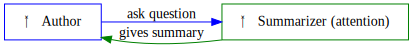

In [15]:
from graphviz import Digraph

dot = Digraph()
dot.attr('node', shape='ellipse')
dot.attr(rankdir='LR')

# Add nodes (with individual attributes)
dot.node('A', '🧑‍🏫 Author', shape='box', color='blue')
dot.node('B', '🧑‍💻 Summarizer (attention)', shape='box', color='green')

# Add edges (with individual attributes)
dot.edge('A', 'B', label='ask question', color='blue')
dot.edge('B', 'A', label='gives summary', color='green')

dot

![](https://ai-bootcamp.ruangguru.com/learn/04_model-usage/00-introduction/00_transformers_hugging_face_files/figure-html/cell-11-output-1.svg)

**For example**: For the input text, “I am Ridho, I live in Jakarta, I am a software engineer at Ruangguru”. When the author queries, “Who is being introduced in this sentence?”, the summarizer (attention) gives a summary: “I am **Ridho**, I live in Jakarta, I am a **software engineer at Ruangguru**”.

Another example with seaborn visualization: for “I just moved here and I want to show you my house, oh by the way, my name is Imam”, the query is “What is my name?”

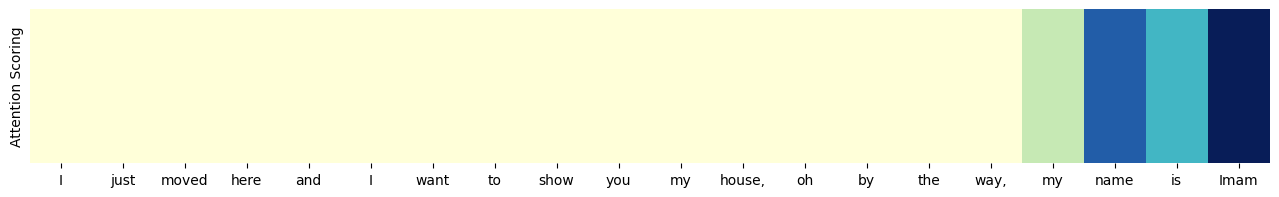

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sentence = "I just moved here and I want to show you my house, oh by the way, my name is Imam".split()
scores = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.4, 0.3, 0.5]).reshape(1, -1)

df_scores = pd.DataFrame(scores, columns=sentence)

plt.figure(figsize=(16, 2))
sns.heatmap(df_scores, cmap='YlGnBu', cbar=False)
plt.yticks([])
plt.ylabel("Attention Scoring")
plt.show()


![](https://ai-bootcamp.ruangguru.com/learn/04_model-usage/00-introduction/00_transformers_hugging_face_files/figure-html/cell-13-output-1.png)

Seaborn visualization can be used to show which words in the sentence are most important. The darker the visualization, the more important the word is. If the author needs more information, they can look at the next lighter keywords.

It is important to remember that attention doesn’t directly resolve the question. It provides clues (through attention scoring) that aid us in finding the answer by pointing out the most crucial words we need to be aware of to answer the question.

### Multi-Head Attention

Transformers utilize a mechanism known as multi-head attention. But why is this important? Multi-head attention allows the model to focus on different positional contexts simultaneously. This resolves the challenge of understanding the various contextual implications of words in a sentence. Each ‘head’ can pay attention to different parts of the input, thereby providing a richer understanding of the data.


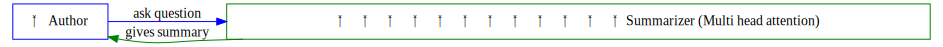

In [17]:
from graphviz import Digraph

dot = Digraph()
dot.attr('node', shape='ellipse')
dot.attr(rankdir='LR')

# Add nodes (with individual attributes)
dot.node('A', '🧑‍🏫 Author', shape='box', color='blue')
dot.node('B', '🧑‍💻 🧑‍💻 🧑‍💻 🧑‍💻 🧑‍💻 🧑‍💻 🧑‍💻 🧑‍💻 🧑‍💻 🧑‍💻 🧑‍💻 🧑‍💻Summarizer (Multi head attention)', shape='box', color='green')

# Add edges (with individual attributes)
dot.edge('A', 'B', label='ask question', color='blue')
dot.edge('B', 'A', label='gives summary', color='green')

dot

![](https://ai-bootcamp.ruangguru.com/learn/04_model-usage/00-introduction/00_transformers_hugging_face_files/figure-html/cell-14-output-1.svg)

**For example**: For the input text, “Taylor feels lonely as his friends move out of the town”. When the author queries, “What does Taylor feel?”

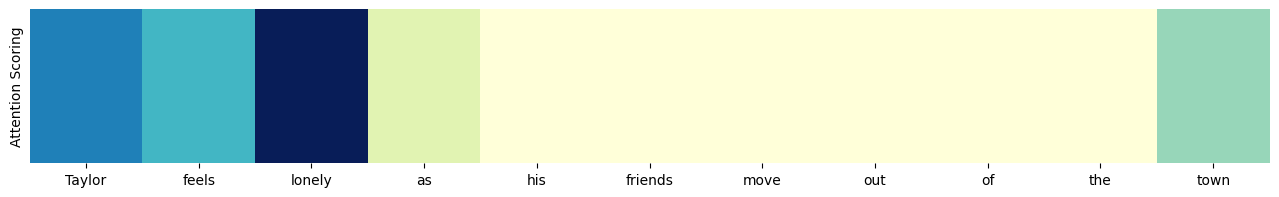

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sentence = "Taylor feels lonely as his friends move out of the town".split()
scores = np.array([0.3, 0.25, 0.4, 0.15, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2]).reshape(1, -1)

df_scores = pd.DataFrame(scores, columns=sentence)

plt.figure(figsize=(16, 2))
sns.heatmap(df_scores, cmap='YlGnBu', cbar=False)
plt.yticks([])
plt.ylabel("Attention Scoring")
plt.show()

![](https://ai-bootcamp.ruangguru.com/learn/04_model-usage/00-introduction/00_transformers_hugging_face_files/figure-html/cell-15-output-1.png)

Each of them summarizes in their own style

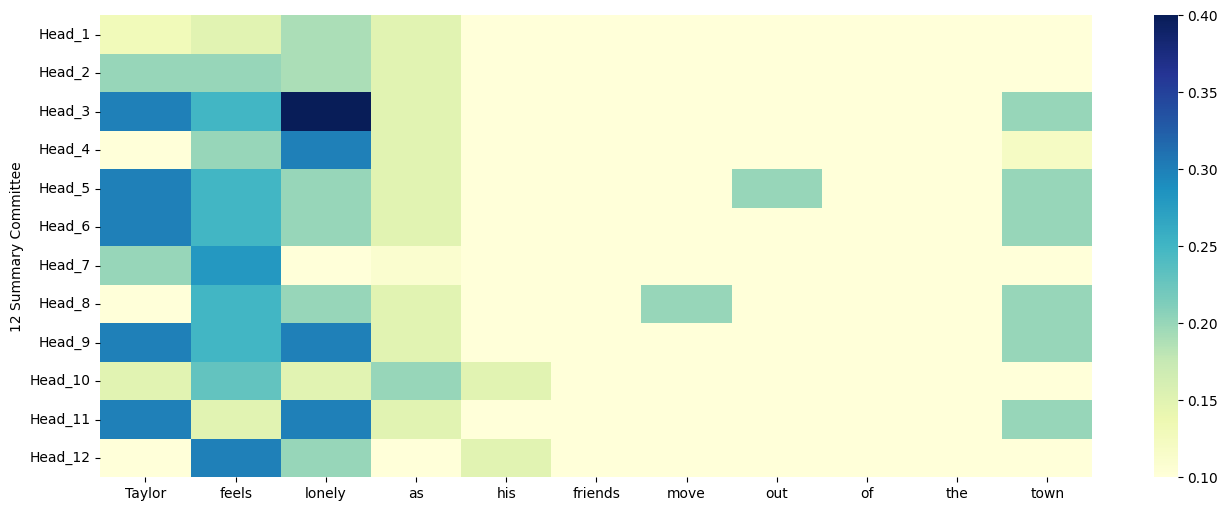

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sentence = "Taylor feels lonely as his friends move out of the town".split()
num_heads = 12

scores = np.array([
    [0.13, 0.15, 0.19, 0.15, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
    [0.2, 0.2, 0.19, 0.15, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
    [0.3, 0.25, 0.4, 0.15, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2],
    [0.1, 0.2, 0.3, 0.15, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.12],
    [0.3, 0.25, 0.2, 0.15, 0.1, 0.1, 0.1, 0.2, 0.1, 0.1, 0.2],
    [0.3, 0.25, 0.2, 0.15, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2],
    [0.2, 0.28, 0.1, 0.11, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
    [0.1, 0.25, 0.2, 0.15, 0.1, 0.1, 0.2, 0.1, 0.1, 0.1, 0.2],
    [0.3, 0.25, 0.3, 0.15, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2],
    [0.15, 0.23, 0.15, 0.2, 0.15, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
    [0.3, 0.15, 0.3, 0.15, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2],
    [0.1, 0.3, 0.2, 0.1, 0.15, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
])

df_scores = pd.DataFrame(scores, columns=sentence)

plt.figure(figsize=(16, num_heads * 0.5))
sns.heatmap(df_scores, cmap='YlGnBu')
plt.ylabel("12 Summary Committee")
plt.yticks(np.arange(num_heads)+0.5, [f'Head_{i+1}' for i in range(num_heads)], rotation=0)
plt.show()

![](https://ai-bootcamp.ruangguru.com/learn/04_model-usage/00-introduction/00_transformers_hugging_face_files/figure-html/cell-16-output-1.png)

Their voices are united

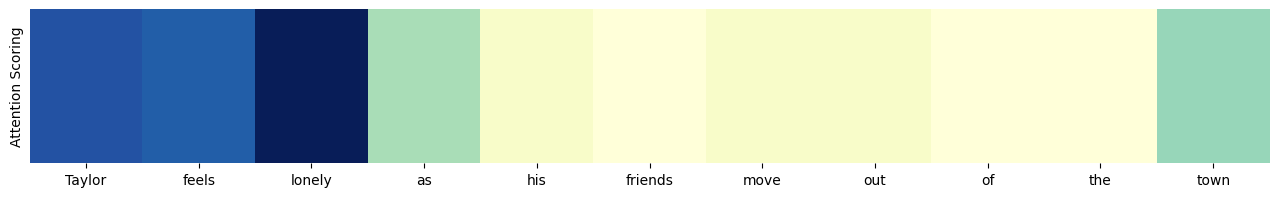

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sentence = "Taylor feels lonely as his friends move out of the town".split()
scores = np.array([0.22083333, 0.21525, 0.25416667, 0.14666667, 0.10833333, 0.1, 0.10833333, 0.10833333, 0.1, 0.1, 0.15166667]).reshape(1, -1)

df_scores = pd.DataFrame(scores, columns=sentence)

plt.figure(figsize=(16, 2))
sns.heatmap(df_scores, cmap='YlGnBu', cbar=False)
plt.yticks([])
plt.ylabel("Attention Scoring")
plt.show()

![](https://ai-bootcamp.ruangguru.com/learn/04_model-usage/00-introduction/00_transformers_hugging_face_files/figure-html/cell-17-output-1.png)

Can we explain what each head is “thinking”? 🤔

The answer is **NO**.

The unity of the heads’ voices is essentially the aggregation of the attention scores from each head, emphasizing the most relevant parts of the input that answer the query. However, not all heads agree on the significance of each word. For instance, some heads may consider the word “move” relevant, hence its dark cyan color, potentially because they think it is a crucial factor leading to Taylor’s loneliness.

We can only speculate each head’s focus. Perhaps one focuses on sentence structure, another on context, and so on. Due to the inscrutability of neural networks, we cannot ascertain the exact thought process of each head (lack of interpretability).

**Conclusion:**

*   Multi-head attention allows each head to focus on different parts of the input to enhance understanding.
*   Each head assigns a score to each word, determining its relevance.
*   The composite of these scores forms the final attention score.
*   The number of heads is dependent on the model.

### Multi-Layer Attention

Transformers also incorporate multi-layer attention. But what does this mean, and why is it necessary? Multi-layer attention allows the model to iteratively refine its understanding of the inputs over multiple layers. Each layer offers the model another opportunity to learn the associations within the data. This layered approach addresses the need for deeper understanding and more complex relationships in the data.

![](https://storage.googleapis.com/rg-ai-bootcamp/model_usage/multi-layer-attention.png)

The heads are duplicated across layers, each being asked to re-learn its task. The number of layers varies depending on the model. The final layer incorporates the heads that best understand the task at hand. However, all heads across all layers are preserved. In rare situations, a head from an earlier layer might be more efficient at accomplishing a task than those in later layers.

#### Interactive attention with BertViz

Now, we’ll use **BertViz** to visualize self-attention in a pre-trained **BERT model** with multiple “heads” capturing different word relationships. A 12-layer, 12-head model generates 144 unique attention mechanisms.

In [23]:
!pip install bertviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.2/84.2 kB 3.0 MB/s eta 0:00:00


In [24]:
from transformers import BertTokenizer, BertModel
from bertviz import head_view

model_version = 'bert-base-uncased'
model = BertModel.from_pretrained(model_version, output_attentions=True)
tokenizer = BertTokenizer.from_pretrained(model_version)
inputs = tokenizer.encode_plus("She is eating a green apple", "She bought the apple from the local market.", return_tensors='pt')

attention = model(inputs['input_ids'], token_type_ids=inputs['token_type_ids'])[-1]
tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0].tolist())

head_view(attention, tokens, inputs['token_type_ids'][0].tolist().index(1))

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

BertSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


<IPython.core.display.Javascript object>

Transformers Applications
-------------------------

Transformers are adaptable and can learn from large data sets for tasks like: - **Translation**: Breaking down language barriers. - **Summarization**: Turning long texts into brief summaries. - **Text Generation**: Creating new text on its own. - and etc.

We’ll explore these amazing uses in more detail in our next discussions!

Back to top